In [2]:
%pip install scikit-learn
%pip install matplotlib
%pip install pandas

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Program Files (x86)\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [3]:
# Import the necessary libraries

import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('11_donor exercise.csv')
df.head()

# Display the data types of each column
df.info()

# Drop Empty rows
df = df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11095 entries, 0 to 11094
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   TARGET_B                     11095 non-null  object 
 1   MONTHS_SINCE_ORIGIN          11095 non-null  int64  
 2   DONOR_AGE                    8532 non-null   float64
 3   INCOME_GROUP                 8801 non-null   float64
 4   WEALTH_RATING                6311 non-null   float64
 5   MEDIAN_HOME_VALUE            11095 non-null  int64  
 6   MEDIAN_HOUSEHOLD_INCOME      11095 non-null  int64  
 7   PER_CAPITA_INCOME            11095 non-null  int64  
 8   RECENT_RESPONSE_COUNT        11095 non-null  int64  
 9   RECENT_CARD_RESPONSE_COUNT   11095 non-null  int64  
 10  MONTHS_SINCE_LAST_PROM_RESP  10952 non-null  float64
 11  LIFETIME_CARD_PROM           11095 non-null  int64  
 12  LIFETIME_GIFT_COUNT          11095 non-null  int64  
 13  CARD_PROM_12    

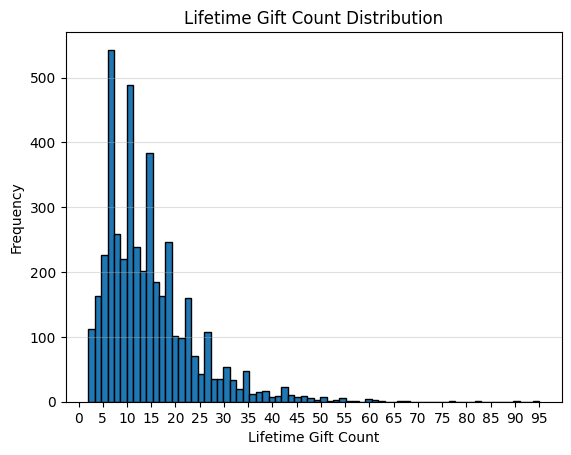

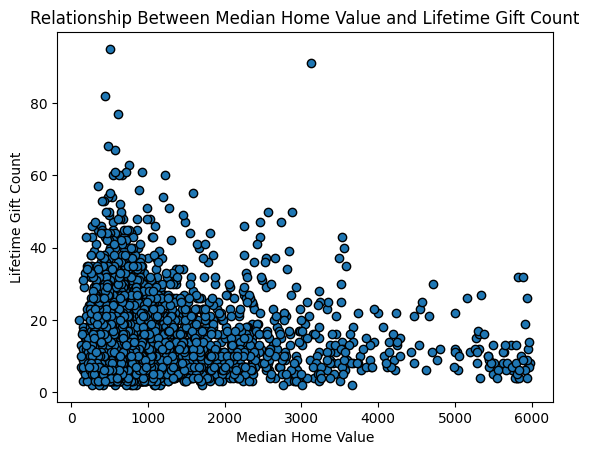

In [4]:
df['LIFETIME_GIFT_COUNT'] = df['LIFETIME_GIFT_COUNT'].astype('category')

# Display the distribution of LIFE_GIFT_COUNT
plt.hist(df['LIFETIME_GIFT_COUNT'] , bins=70, edgecolor='black')
plt.title('Lifetime Gift Count Distribution')
plt.xlabel('Lifetime Gift Count')
plt.ylabel('Frequency')
plt.xticks(np.arange(0, 100, 5))
plt.grid(axis='y', alpha=0.4)
plt.show()

# Display the Relationship Between MEDIAN_HOMES_VALUE and LIFETIME_GIFT_COUNT
plt.scatter(df['MEDIAN_HOME_VALUE'], df['LIFETIME_GIFT_COUNT'], edgecolors='black')
plt.title('Relationship Between Median Home Value and Lifetime Gift Count')
plt.xlabel('Median Home Value')
plt.ylabel('Lifetime Gift Count')
plt.show()

In [2]:
df["TARGET_B"].value_counts()

df.head()

,TARGET_B,MONTHS_SINCE_ORIGIN,DONOR_AGE,INCOME_GROUP,WEALTH_RATING,MEDIAN_HOME_VALUE,MEDIAN_HOUSEHOLD_INCOME,PER_CAPITA_INCOME,RECENT_RESPONSE_COUNT,RECENT_CARD_RESPONSE_COUNT,MONTHS_SINCE_LAST_PROM_RESP,LIFETIME_CARD_PROM,LIFETIME_GIFT_COUNT,CARD_PROM_12,NUMBER_PROM_12,MONTHS_SINCE_LAST_GIFT,MONTHS_SINCE_FIRST_GIFT
1,YES,65,54.0,7.0,9.0,5946,1500,130295,3,3,17.0,19,8,6,13,15,56
5,YES,89,17.0,6.0,9.0,5324,1159,95913,2,1,24.0,19,4,6,12,24,81
6,YES,101,85.0,6.0,9.0,5980,1500,94863,3,3,16.0,28,8,6,13,16,105
7,YES,77,69.0,6.0,9.0,5817,931,91576,9,6,11.0,34,32,10,27,6,76
10,NO,113,79.0,5.0,6.0,5309,1275,88894,2,1,18.0,24,12,4,11,18,113


In [5]:
X = df.iloc[:,1:16]
y = df.iloc[:, 0]

In [6]:
# Split data into training (80%) and testing (20%) sets, using seed 80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=80)

# Create and train the decision tree model
model = DecisionTreeClassifier(random_state=80,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=80)

In [7]:
print(model.classes_)

['NO' 'YES']


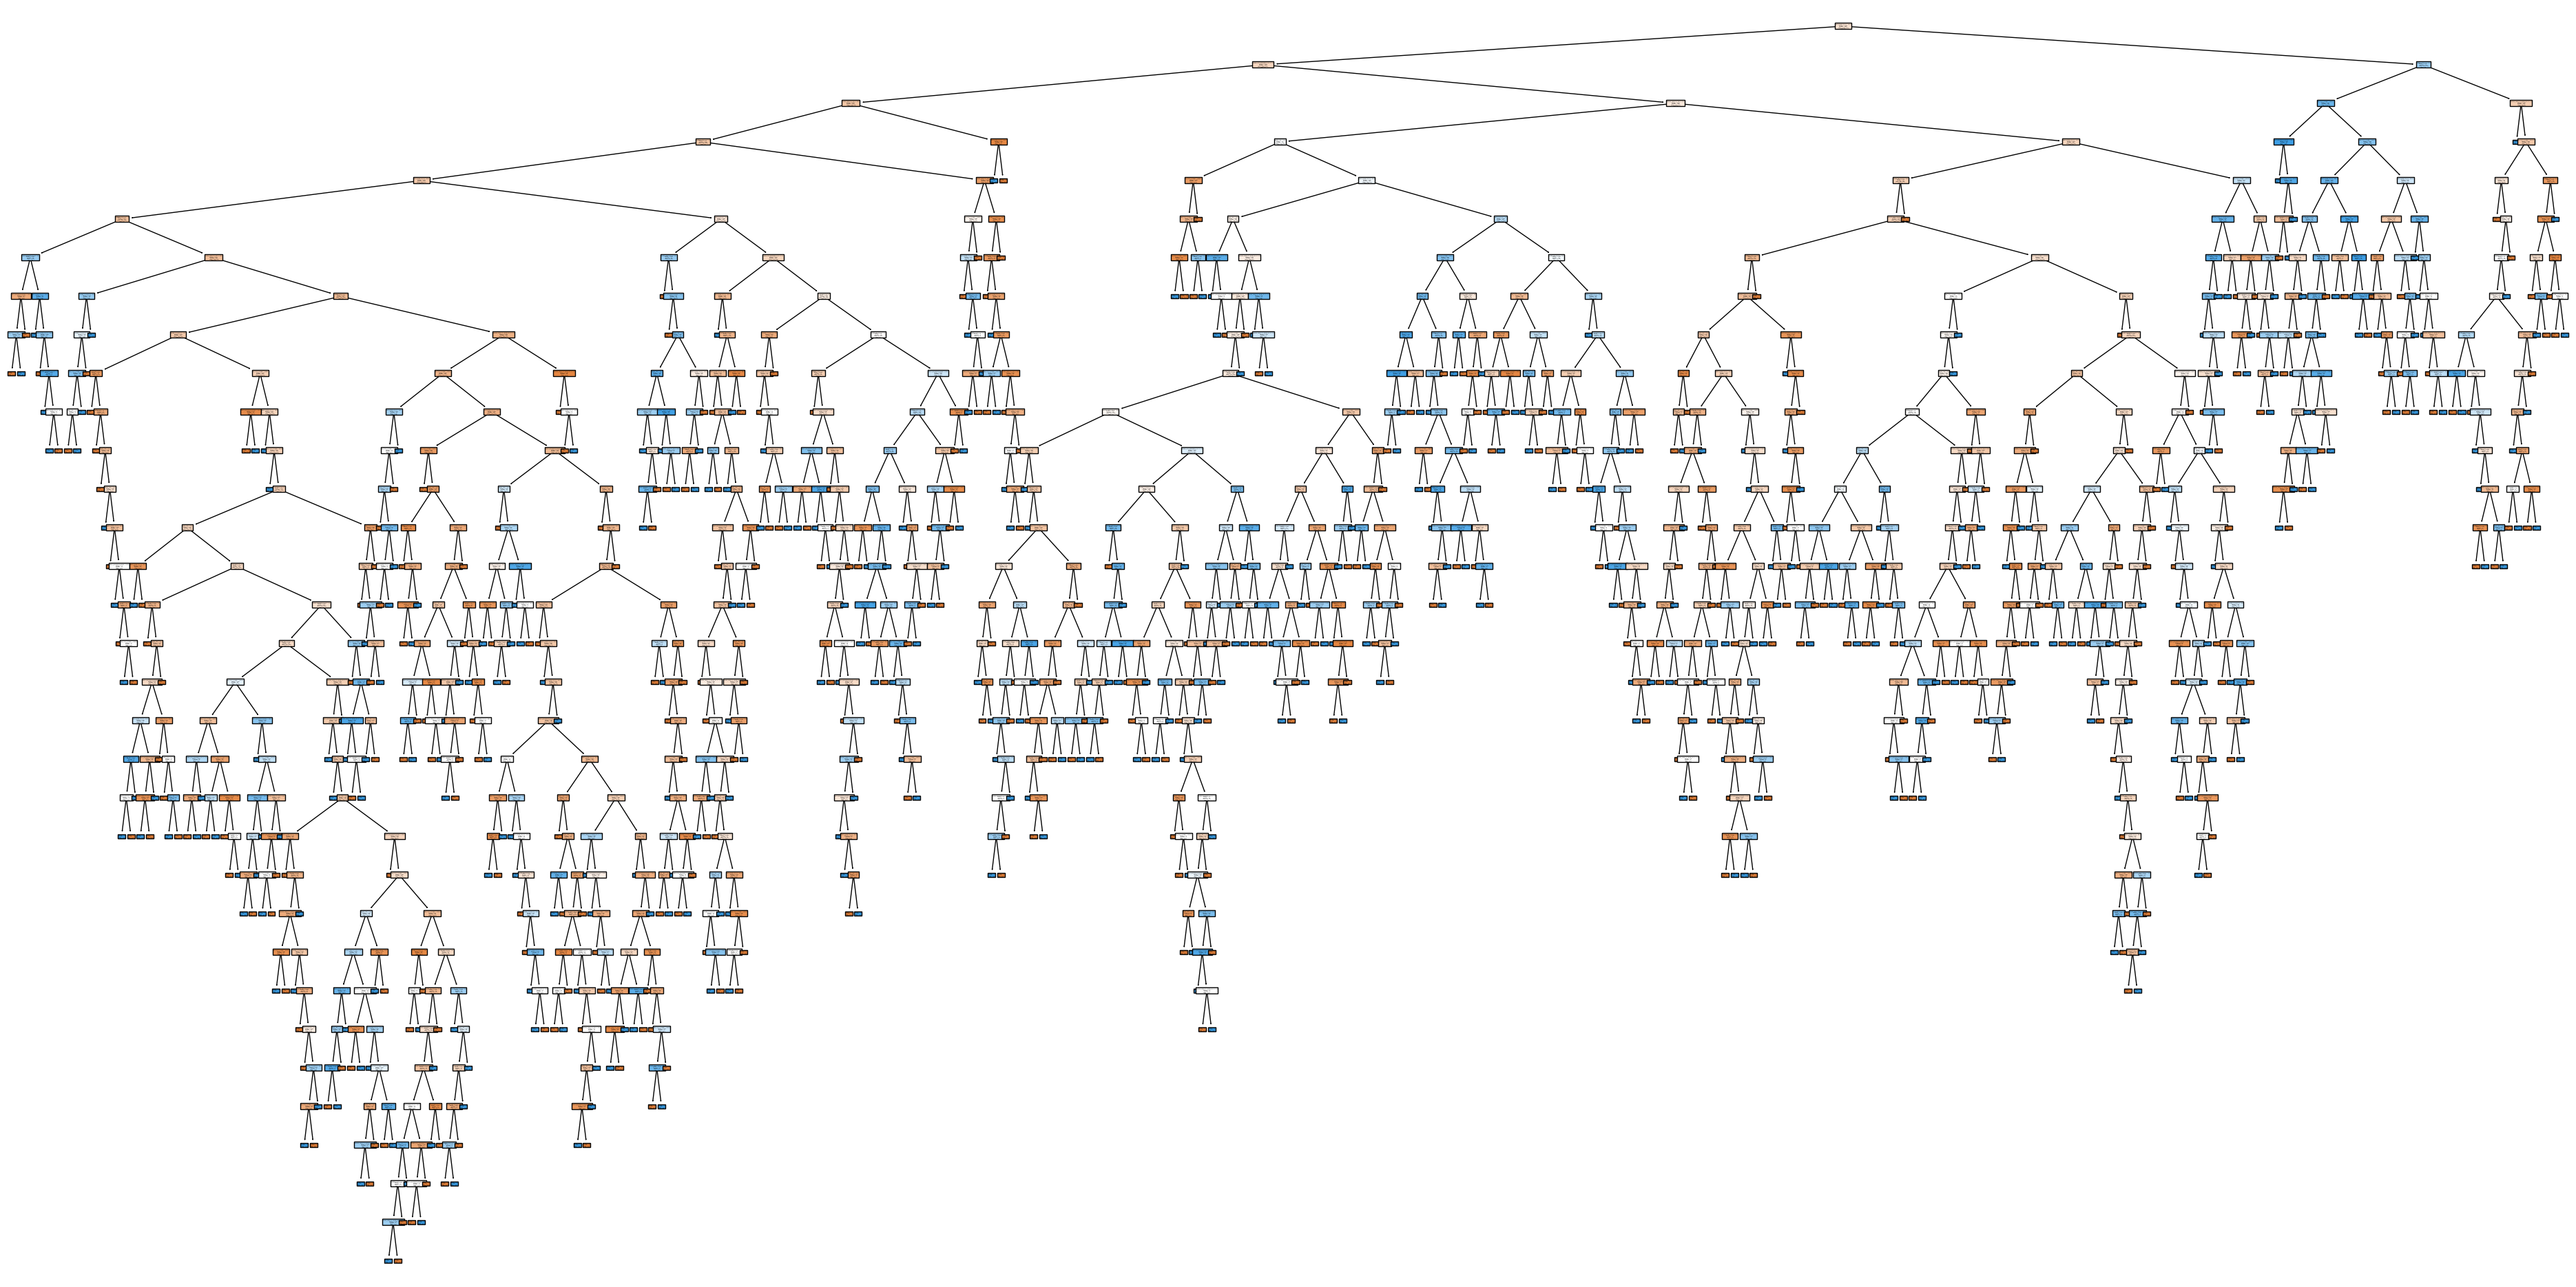

In [8]:
plt.figure(figsize=(48,24))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [23]:
## Set constraints when creating the tree
pruned_tree = DecisionTreeClassifier(
    random_state=80,
    criterion='entropy',
    max_depth=8,                  # Limit the depth of the tree
    min_samples_split=2,           # Min samples required to split a node
    #min_samples_leaf=2,           # Min samples required in a leaf node
    max_leaf_nodes=10,            # Max number of leaf nodes
    #min_impurity_decrease=0.01     # Min impurity decrease required for splitting
)

pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=8, max_leaf_nodes=10,
                       random_state=80)

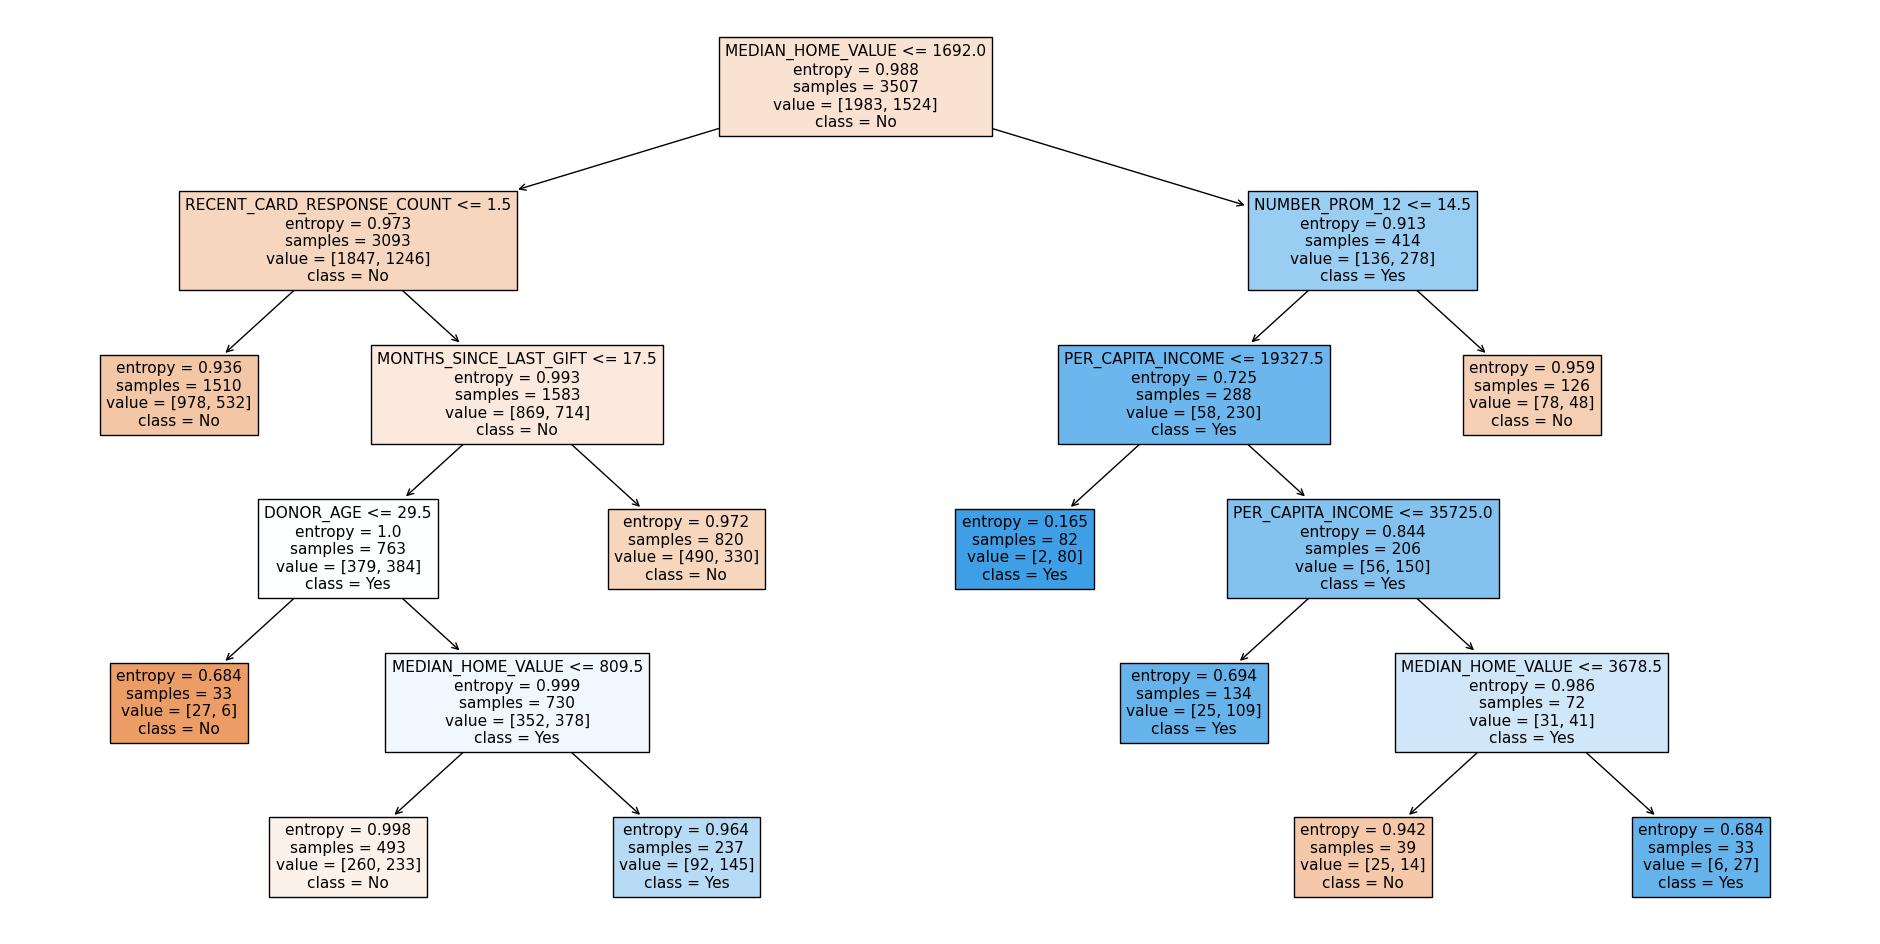

In [24]:
plt.figure(figsize=(24,12))
plot_tree(pruned_tree, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

In [25]:
y_pred_1 = model.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_1)

0.56442417331813

In [26]:
# Predictions on the test set
y_pred_2 = pruned_tree.predict(X_test)

# Compute accuracy, sensitivity, and specificity
accuracy_score(y_test, y_pred_2)

0.6225769669327252

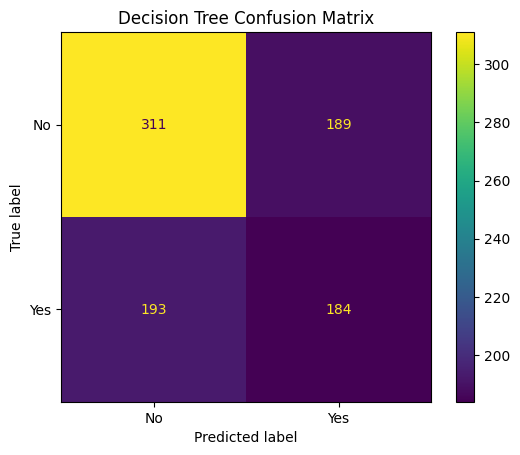

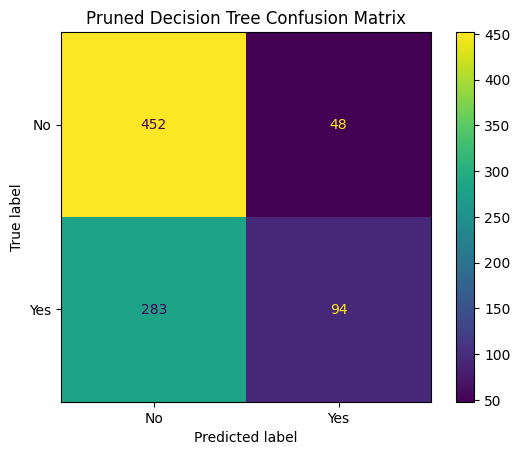

In [27]:
from sklearn import metrics

confusion_matrix_dTree = metrics.confusion_matrix(y_test, y_pred_1)
confusion_matrix_PrunedDtree = metrics.confusion_matrix(y_test, y_pred_2)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_dTree, display_labels = ['No', 'Yes'])
cm_display2 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix_PrunedDtree, display_labels = ['No', 'Yes'])

cm_display.plot()
cm_display.ax_.set_title('Decision Tree Confusion Matrix')
plt.show()

cm_display2.plot()
cm_display2.ax_.set_title('Pruned Decision Tree Confusion Matrix')
plt.show()

In [32]:
print("The promotional strategies that should be used are:")
print("1. Send promotional materials to donors.")
print("2. The income of the neighborhood should be in the 19375 range.")
print("3. The median home value should be in the 3678 range.")

print("\nThe Decison Rules are:")
print("1. If the income of the neighborhood is in the 19375 range, then send promotional materials to donors.")
print("2. If the median home value is in the 3678 range, then send promotional materials to donors.")

The promotional strategies that should be used are:
1. Send promotional materials to donors.
2. The income of the neighborhood should be in the 19375 range.
3. The median home value should be in the 3678 range.

The Decison Rules are:
1. If the income of the neighborhood is in the 19375 range, then send promotional materials to donors.
2. If the median home value is in the 3678 range, then send promotional materials to donors.
